In [240]:
from rdflib import Graph, ConjunctiveGraph, RDF, RDFS, OWL
from SPARQLWrapper import SPARQLWrapper2
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import functools

## define function for printing pandas dataframes as markdown

In [120]:
def print_pandas_md(df):
    print(tabulate(df, tablefmt="pipe", headers="keys"))

## define function for converting sparql results to a dataframe

In [ ]:
def sparql_to_df(results):
    data = {}
    for variable in results.variables:
        data[variable] = [x.value for x in results.getValues(variable)]
    return pds.DataFrame(data)

## define function to round values in an interval object

In [215]:
def round_interval(interval):
    left_val = round(interval.left)
    right_val = round(interval.right)
    return pds.Interval(left=left_val, right=right_val, closed='left')

## set connection to local triple store

In [44]:
sparql = SPARQLWrapper2("http://192.168.1.243:7200/repositories/EDR_NO_ES")

## test getting some results

In [39]:
q = "select ?s ?p ?o where { ?s ?p ?o } limit 5"
sparql.setQuery(q)
res = sparql.query()
sparql_to_df(res)

,s,p,o
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#Pro...
1,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Thing
2,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#ObjectProperty
3,http://www.w3.org/1999/02/22-rdf-syntax-ns#Pro...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2000/01/rdf-schema#Class
4,http://www.w3.org/1999/02/22-rdf-syntax-ns#Pro...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2002/07/owl#Class


## define some standard prefixes to use in queries

In [60]:
prefixes = """
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX part_of: <http://purl.obolibrary.org/obo/BFO_0000050>
PREFIX has_part: <http://purl.obolibrary.org/obo/BFO_0000051>
PREFIX material: <http://purl.obolibrary.org/obo/OHD_0000000>
PREFIX tooth: <http://purl.obolibrary.org/obo/FMA_12516>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX ada_num: <http://purl.obolibrary.org/obo/OHD_0000065>
PREFIX patient: <http://purl.obolibrary.org/obo/OHD_0000012>
PREFIX male_patient: <http://purl.obolibrary.org/obo/OHD_0000054>
PREFIX female_patient: <http://purl.obolibrary.org/obo/OHD_0000049>
PREFIX provider: <http://purl.obolibrary.org/obo/OHD_0000051>
PREFIX procedure: <http://purl.obolibrary.org/obo/OHD_0000002>
PREFIX restoration_procedure: <http://purl.obolibrary.org/obo/OHD_0000004>
PREFIX participates_in: <http://purl.obolibrary.org/obo/BFO_0000056>
PREFIX has_participant: <http://purl.obolibrary.org/obo/BFO_0000057>
PREFIX has_specified_input: <http://purl.obolibrary.org/obo/OBI_0000293>
PREFIX has_specified_output: <http://purl.obolibrary.org/obo/OBI_0000299>
PREFIX sesame: <http://www.openrdf.org/schema/sesame#>
PREFIX birth_date: <http://purl.obolibrary.org/obo/OHD_0000050>
PREFIX npbrn_id: <http://purl.obolibrary.org/obo/OHD_0000273>
"""

## find total number of patients that had a procedure

In [64]:
q = """
%s
select distinct ?patient_id ?gender ?dob ?practice where {
    values ?gender_type {obo:OHD_0000049 obo:OHD_0000054}
    ?patient_i a patient:;
               birth_date: ?bdate;
               npbrn_id: ?npbrn_id;
             sesame:directType ?gender_type .
    ?tooth_i a tooth:;
           part_of: ?patient_i .
    ?proc_i a procedure:;
          has_specified_input: ?tooth_i .
    filter (!isblank(?patient_i))

    bind(strafter(str(?patient_i), "patient/") as ?patient_id)
    bind(strbefore(str(?bdate), "T") as ?dob)
    bind(strafter(str(?npbrn_id), "NDPBRN practice ") as ?practice)
    bind (if(?gender_type = obo:OHD_0000049, "female", "male") as ?gender )
}
""" % prefixes
print(q)



PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX part_of: <http://purl.obolibrary.org/obo/BFO_0000050>
PREFIX has_part: <http://purl.obolibrary.org/obo/BFO_0000051>
PREFIX material: <http://purl.obolibrary.org/obo/OHD_0000000>
PREFIX tooth: <http://purl.obolibrary.org/obo/FMA_12516>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX ada_num: <http://purl.obolibrary.org/obo/OHD_0000065>
PREFIX patient: <http://purl.obolibrary.org/obo/OHD_0000012>
PREFIX male_patient: <http://purl.obolibrary.org/obo/OHD_0000054>
PREFIX female_patient: <http://purl.obolibrary.org/obo/OHD_0000049>
PREFIX provider: <http://purl.obolibrary.org/obo/OHD_0000051>
PREFIX procedure: <http://purl.obolibrary.org/obo/OHD_0000002>
PREFIX restoration_procedure: <http://purl.obolibrary.org/obo/OHD_0000004>
PREFIX participates_in: <http://purl.obolibrary.org/obo/BFO_0000056>
PREFIX has_participant: <http://purl.obolibrary.org/obo/BFO_0000057>
PREFIX has_specifi

In [66]:
sparql.setQuery(q)
res = sparql.query()
patient_df = sparql_to_df(res)

In [90]:
patient_df.drop_duplicates(inplace=True) # make sure there are not duplicates
len(patient_df)

226800

## calculate patients age as of 2017, include only patients with age > 0, and save to file

In [305]:
## calculate age of patient as of 2017
patient_df.dob = pds.to_datetime(patient_df.dob)
patient_df['patient_age'] = 2017 - pds.to_datetime(patient_df.dob).dt.year

In [306]:
# drop patients with age less than 0
patient_df = patient_df.query('patient_age > 0')

In [307]:
patient_df.to_csv('triplestore-patient-info.tsv', sep='\t')

## get patient counts by gender and plot

In [310]:
gender_count = patient_df.gender.value_counts()
gender_count.loc['total'] = len(patient_df)
gender_count

female    126692
male      100106
total     226798
Name: gender, dtype: int64

In [311]:
# print_pandas_md(pds.DataFrame(gender_count)) # in case I need the table in markdown

/Users/widuncan/repos/git/NDPBRN/src/analysis/.env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


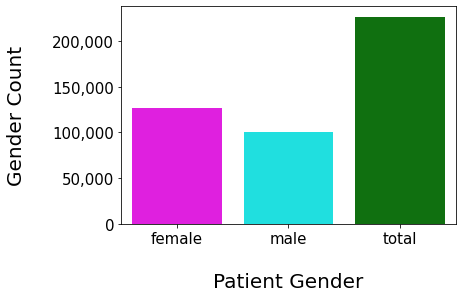

In [312]:
%matplotlib inline

# plot gender counts
# ax = sns.countplot(x="gender", data=group)
colors = ['magenta', 'cyan', 'green']
sns.set_palette(colors)
ax = sns.barplot(x=gender_count.index, y=gender_count.values)
ax.set_xlabel("\nPatient Gender", size=20)
ax.set_ylabel("Gender Count\n", size=20)
plt.xticks(size=15)
plt.yticks(size=15)

## put commas in y-ticks
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

plt.savefig("figures/patient-gender-counts.png", dpi=600, bbox_inches="tight")
plt.show()

## calculate age distributions and plot

In [313]:
age_table = \
    pds.DataFrame(pds.cut(patient_df['patient_age'], 10).value_counts().sort_index()).reset_index()
age_table.rename(columns={'index': 'Age Range', 'patient_age': 'Total'}, inplace=True)
age_table['Age Range'] = age_table['Age Range'].map(lambda x: round_interval(x))
age_table['Percent'] = round((age_table['Total'] / 226798) * 100, 1)
# print_pandas_md(age_table)
age_table.to_clipboard()
age_table

,Age Range,Total,Percent
0,"[2, 13)",8502,3.7
1,"[13, 24)",32092,14.2
2,"[24, 36)",42110,18.6
3,"[36, 47)",42205,18.6
4,"[47, 58)",43160,19.0
5,"[58, 69)",32554,14.4
6,"[69, 80)",17389,7.7
7,"[80, 92)",7275,3.2
8,"[92, 103)",1409,0.6
9,"[103, 114)",102,0.0


/Users/widuncan/repos/git/NDPBRN/src/analysis/.env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


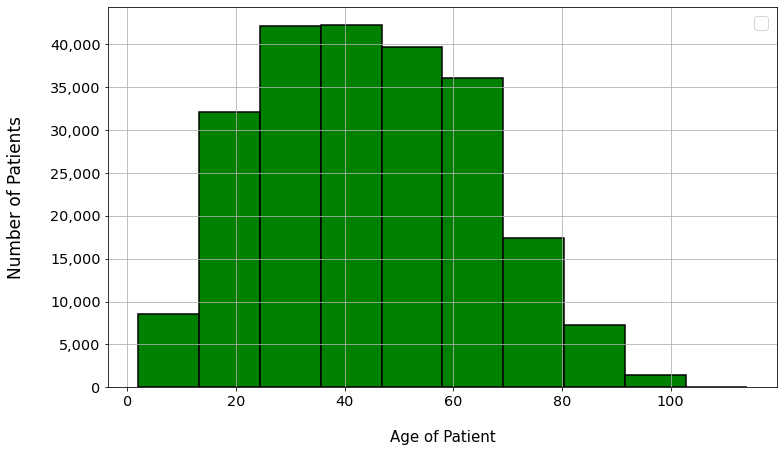

In [314]:
%matplotlib inline

# plot age distribution
ax = patient_df['patient_age']\
        .hist(bins=10, color='green', edgecolor='black', linewidth=1.5,figsize=(12,7))

ax.set_xlabel("\nAge of Patient", fontsize=15)
ax.set_ylabel("Number of Patients\n", fontsize=17)

ax.tick_params(labelsize='x-large') # use large labels
plt.xticks(rotation=0)  # rotate the ticks on the x axis

## put commas in y-ticks
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

plt.legend(loc='upper right', prop={'size': 18})
plt.savefig("figures/patient-age-distribution.png", dpi=600, bbox_inches="tight")
plt.show()

### use the same intervals for females and males that was used for the total age distribution

In [315]:
age_bins = pds.IntervalIndex(age_table['Age Range'])
age_bins

IntervalIndex([[2, 13), [13, 24), [24, 36), [36, 47), [47, 58), [58, 69), [69, 80), [80, 92), [92, 103), [103, 114)],
              closed='left',
              name='Age Range',
              dtype='interval[int64]')

### calculate female age intervals

In [316]:
females = patient_df.query("gender == 'female'")['patient_age']
female_age_table = \
    pds.DataFrame(pds.cut(females, age_bins).value_counts().sort_index()).reset_index()
female_age_table.rename(columns={'index': 'Age Range', 'patient_age': 'Total'}, inplace=True)
female_age_table['Age Range'] = female_age_table['Age Range'].map(lambda x: round_interval(x))
female_age_table['Percent Female'] = round((female_age_table['Total'] / 226798) * 100, 1)
# print_pandas_md(female_age_table)
female_age_table.to_clipboard()
female_age_table

,Age Range,Total,Percent Female
0,"[2, 13)",3451,1.5
1,"[13, 24)",15690,6.9
2,"[24, 36)",26056,11.5
3,"[36, 47)",24658,10.9
4,"[47, 58)",22545,9.9
5,"[58, 69)",18790,8.3
6,"[69, 80)",10110,4.5
7,"[80, 92)",4464,2.0
8,"[92, 103)",858,0.4
9,"[103, 114)",69,0.0


### calculate male age intervals

In [317]:
males = patient_df.query("gender == 'male'")['patient_age']
male_age_table = \
    pds.DataFrame(pds.cut(males, age_bins).value_counts().sort_index()).reset_index()
male_age_table.rename(columns={'index': 'Age Range', 'patient_age': 'Total'}, inplace=True)
male_age_table['Age Range'] = male_age_table['Age Range'].map(lambda x: round_interval(x))
male_age_table['Percent Male'] = round((male_age_table['Total'] / 226798) * 100, 1)
# print_pandas_md(male_age_table)
male_age_table.to_clipboard()
male_age_table

,Age Range,Total,Percent Male
0,"[2, 13)",3228,1.4
1,"[13, 24)",14656,6.5
2,"[24, 36)",19623,8.7
3,"[36, 47)",17547,7.7
4,"[47, 58)",17105,7.5
5,"[58, 69)",14802,6.5
6,"[69, 80)",8793,3.9
7,"[80, 92)",3769,1.7
8,"[92, 103)",551,0.2
9,"[103, 114)",32,0.0


### plot female/male age distribution

/Users/widuncan/repos/git/NDPBRN/src/analysis/.env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


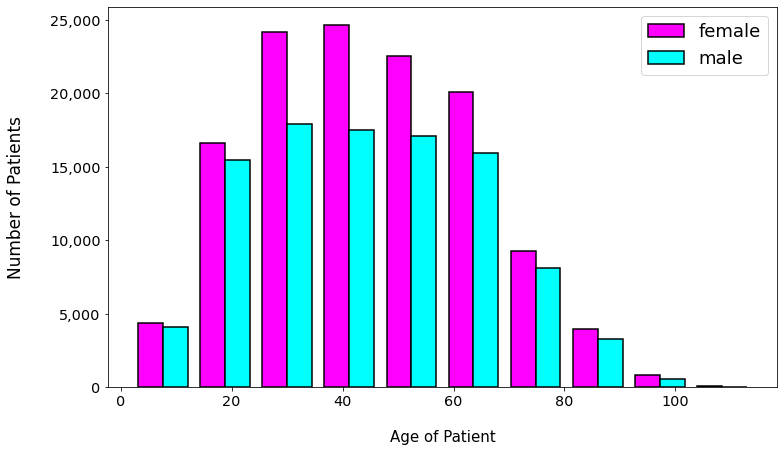

In [318]:
%matplotlib inline
colors = ['magenta', 'cyan', 'green']
sns.set_palette(colors)

# create separate series for genders
females = patient_df.query("gender == 'female'")['patient_age']
males = patient_df.query("gender == 'male'")['patient_age']

fig, ax = plt.subplots(figsize=(12,7)) 
ax.hist([females, males], bins=10, edgecolor='black', linewidth=1.5, label=['female', 'male'])
ax.set_xlabel("\nAge of Patient", fontsize=15)
ax.set_ylabel("Number of Patients\n", fontsize=17)

ax.tick_params(labelsize='x-large') # use large labels
plt.xticks(rotation=0)  # rotate the ticks on the x axis

## put commas in y-ticks
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

# plt.figure(figsize=(12,7))
plt.legend(loc='upper right', prop={'size': 18})
plt.savefig("figures/patient-age-gender-distribution.png", dpi=600, bbox_inches="tight")
plt.show()

In [259]:
############ OLD CODE ###########
# %matplotlib inline

# # plot age/gender distribution
# ax = df_females["patient_age"]\
#         .hist(bins=10, alpha=0.5, color='magenta', label='female', edgecolor='black', linewidth=1.5,figsize=(12,7))
# ax = df_males["patient_age"]\
#         .hist(bins=10, alpha=0.5, color='cyan', label='male', edgecolor='black', linewidth=1.5, figsize=(12,7))

# ax.set_xlabel("\nAge of Patient", fontsize=15)
# ax.set_ylabel("Number of Patients\n", fontsize=17)

# ax.tick_params(labelsize='x-large') # use large labels
# plt.xticks(rotation=0)  # rotate the ticks on the x axis

# ## put commas in y-ticks
# ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

# plt.legend(loc='upper right', prop={'size': 18})
# plt.savefig("figures/patient-age-gender-distribution.png", dpi=600, bbox_inches="tight")
# plt.show()